## References
- https://towardsdatascience.com/an-overview-of-time-series-forecasting-models-a2fa7a358fcb
- https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
- https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acf.html
- https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/
- https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
- https://www.datacamp.com/community/tutorials/lstm-python-stock-market
- https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

In [24]:
keyboard = "abcdefghijklmnopqrstuvwxyz"

keyboard_map = {v: k for k, v in enumerate(keyboard)}

In [ ]:
for

In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa import seasonal

from IPython.display import display, Markdown

In [2]:
df_raw = pd.read_csv("../data/monthly-sunspots.csv", parse_dates=["Month"], infer_datetime_format=True)

In [3]:
df_raw.head()

,Month,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


In [4]:
df = df_raw.copy().rename(columns=str.lower).set_index("month")

In [5]:
df.dtypes

sunspots    float64
dtype: object

In [6]:
df.shape

(2820, 1)

- simple line plot
- rolling mean
- rolling diff (first order)
- autocorrelation

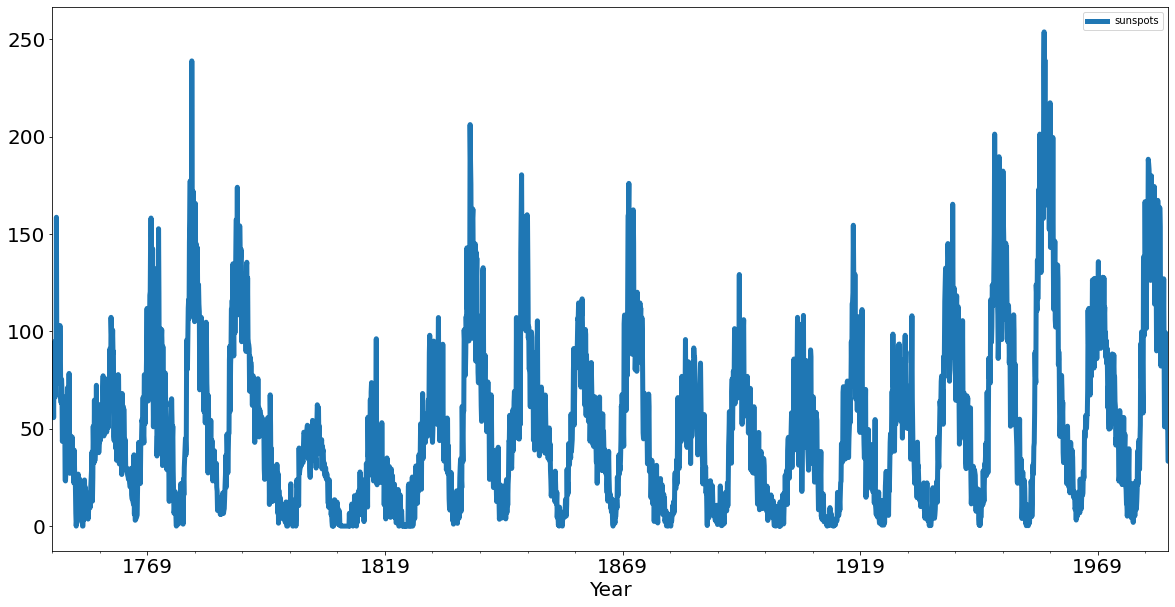

In [7]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

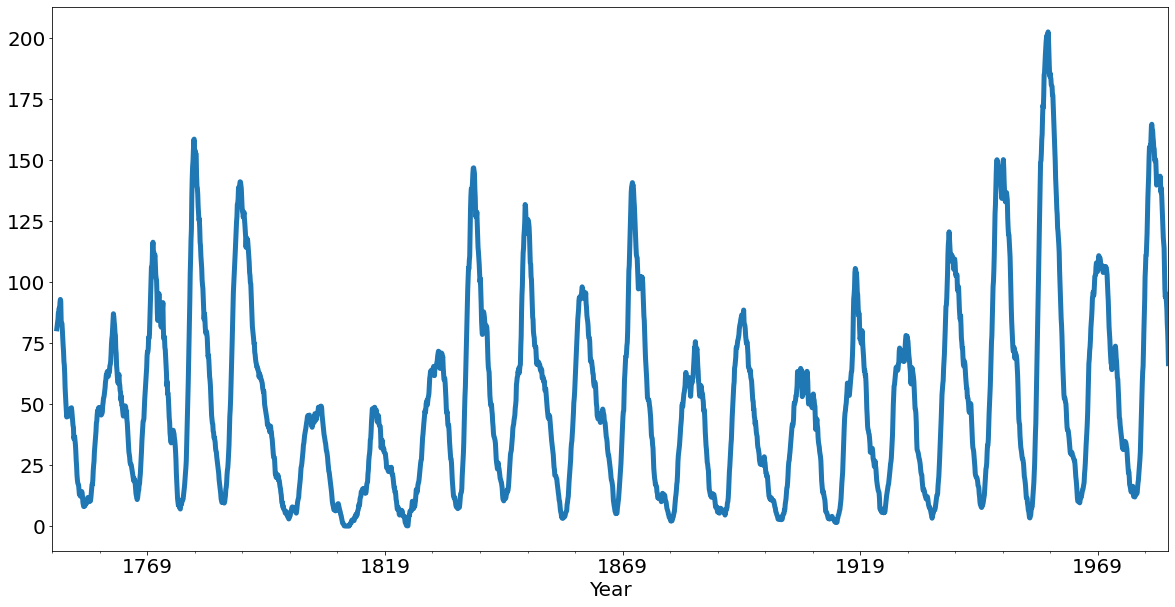

In [8]:
df.sunspots.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

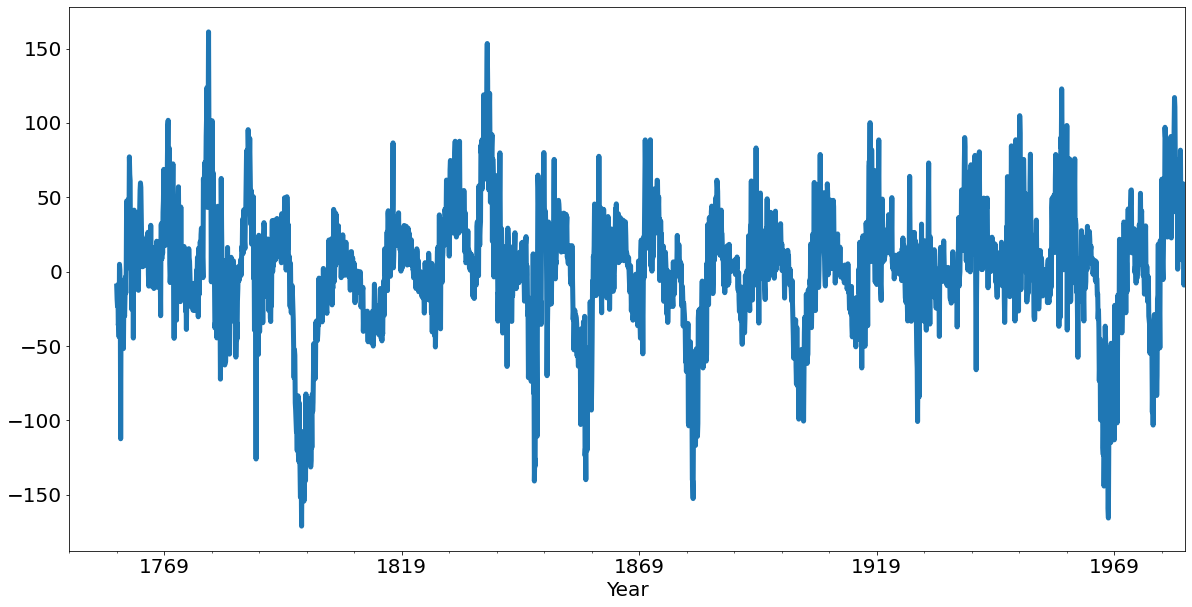

In [9]:
df.sunspots.diff(120).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

## Autocorrelation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

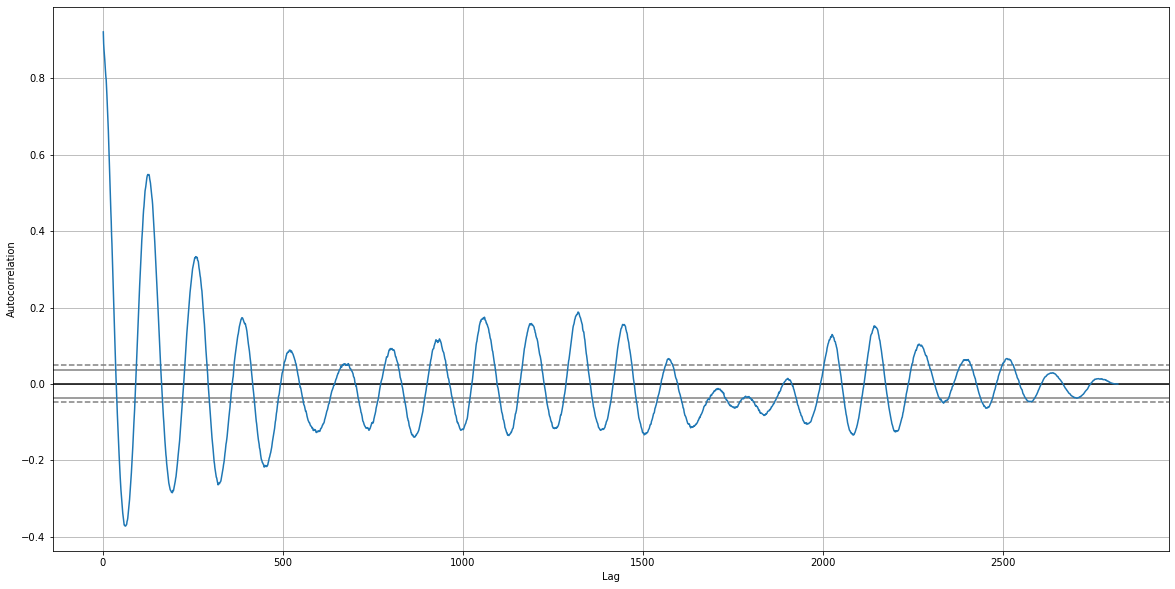

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
pd.plotting.autocorrelation_plot(df.sunspots, ax=ax)

In [11]:
ax.lines[0].get_data()

([0, 1], [0.04850567196862744, 0.04850567196862744])

In [12]:
for l in ax.lines:
    print(l.get_data())

([0, 1], [0.04850567196862744, 0.04850567196862744])
([0, 1], [0.0369082570702337, 0.0369082570702337])
([0, 1], [0.0, 0.0])
([0, 1], [-0.0369082570702337, -0.0369082570702337])
([0, 1], [-0.04850567196862744, -0.04850567196862744])
(array([   1,    2,    3, ..., 2818, 2819, 2820]), array([ 9.21686098e-01,  8.90472197e-01,  8.74532497e-01, ...,
       -6.07840163e-05, -2.26072678e-05,  0.00000000e+00]))


In [13]:
autocorr_data = ax.lines[-1].get_data()

In [14]:
autocorr_df = pd.DataFrame(autocorr_data).T

In [15]:
autocorr_df.columns=["x", "y"]

In [16]:
autocorr_df.sort_values("y", ascending=False).head(20)

,x,y
0,1.0,0.921686
1,2.0,0.890472
2,3.0,0.874532
3,4.0,0.863532
4,5.0,0.849594
5,6.0,0.836293
6,7.0,0.819134
7,8.0,0.805382
8,9.0,0.797082
9,10.0,0.778191


# Decompose

In [17]:
result = seasonal.seasonal_decompose(df.sunspots, model='additive', period=125)

In [18]:
# print(result.trend)
# print(result.seasonal)
# print(result.resid)
# print(result.observed)

In [19]:
display(
    result.trend.to_frame().tail(),
    result.seasonal.to_frame().head()
)

,trend
month,
1983-08-01,NaN
1983-09-01,NaN
1983-10-01,NaN
1983-11-01,NaN
1983-12-01,NaN


,seasonal
month,
1749-01-01,13.270173
1749-02-01,15.882937
1749-03-01,11.628755
1749-04-01,15.862355
1749-05-01,15.700901


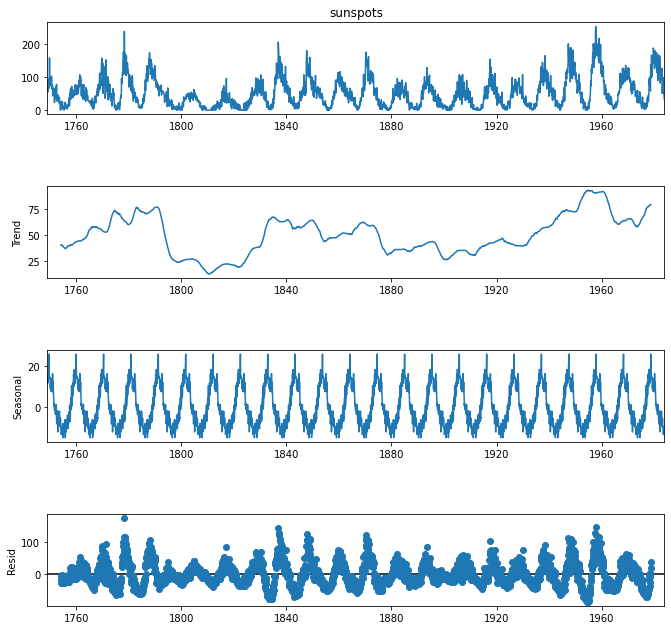

In [20]:
fig = result.plot()
fig.set_size_inches(10, 10)

# ARIMA
Autoregressive Integrated Moving Average 

In [22]:
# from statsmodels.tsa.arima.model import ARIMA
# from matplotlib import pyplot
# # load dataset
# def parser(x):
# 	return datetime.strptime('190'+x, '%Y-%m')
# series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# series.index = series.index.to_period('M')
# # fit model
# model = ARIMA(series, order=(5,1,0))
# model_fit = model.fit()
# # summary of fit model
# print(model_fit.summary())
# # line plot of residuals
# residuals = DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()
# # density plot of residuals
# residuals.plot(kind='kde')
# pyplot.show()
# # summary stats of residuals
# print(residuals.describe())

# LTSM
Long short-term memory model